## < step1. 탐색 > : 데이터 기초정보 살펴보기 

### .CSV
행이 ','(쉼표)로 구분된 텍스트 파일

### .TSV
행이 Tap(탭)으로 구분된 텍스트 파일

### 엑셀파일(.xlx)은 파이썬으로 불러올수 없음 따라서 내보내기로 파일형식(.csv .tsv)을 변경 해주어야함.

### 데이터의 외형적 분석
탐색적 데이터 분석은 데이터를 열어보는 상황에서부터 시작되며 다음과 같은 과정을 수행

1. 데이터의 출처와 주제에대해 이해하기

2. 데이터의 크기 알아보기

샘플링 (Sampling):

 어떤 자료로부터 일부의 값을 추출하는행위
 
 분석하고자 하는 데이터가 너무 크거나 전체 데이터를 사용할 수 없는 경우 샘플링된 데이터를 분석.
 
3. 데이터의 구성요소(피쳐) 살펴보기

### 데이터의 속성 탐색
데이터의 외형적인 힌트를 얻었다면 실제적인 내용을 탐색하는 단계
1. 피처의 속성탐색
2.피처간의 상관 관계 탐색

### 탐색한 데이터의 시각화
수치적 자료만 가지고 파악하기 힘든 경우 효과적

#### 토이 데이터(분석에 용이한 형태로 만들어진 연습용 데이터 세트)를 활용한 데이터 분석 학습

### [Chipotle 데이터셋의 기본 정보]

In [1]:
#pandas 모듈 import
import pandas as pd

#read_csv()함수로 데이터를 DataFrame형태로 불러옵니다.
#read_csv("파일경로를 포함한 파일명",sep="구분자")
file_path='../data/chipotle.tsv' #파일 경로 변수로 설정.
chipo = pd.read_csv(file_path,sep='\t')

print(chipo.shape)##행 렬의 정보를 출력하는 함수.(몇행(행의 이름을 제외하고) 몇열)
print("-----------------------------------------------")
print(chipo.info())##불러온 데이터의 DataFrame 정보

(4622, 5)
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
#chipo라는 데이터 프레임에서 순서대로 (행(rows)기준)10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
#역순으로도 출력가능
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
#행의 목록(colunms의 header)과 열의 목록(index))에 대한 정보를 함께 출력 가능.
print(chipo.columns)
print("-----------------------------------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-----------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


### [chipotle 데이터셋의 수치적 특성 파악]
#### quantity와 itemp_price의 수치적 특징
#### describe() 함수로 수치형 기초 통계량 출력하기
#### order_id와 imtem_name의 개수 모두 수치형이다.
order_id는 숫자의 의미를 가지지 않기때문에 str으로 변환시켜 통계에 포함되지 않게함

In [5]:
chipo['order_id']=chipo['order_id'].astype(str)
chipo.describe() #숫자로 통계될수있는 모든 피처 정보 출력

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


#### unique()함수로 범주형 피처의 개수 출력하기 
중복되는 피처를 제외하고 몇개의 범주가 있는지 확인

In [6]:
#order_id의 개수 출력
len(chipo['order_id'].unique())

1834

In [7]:
#item_name의 개수 출력
len(chipo['item_name'].unique())

50

### 인사이트의 발견 : 탐색과 시각화 하기.
#### 가장 많이 주문한 아이템 top10 출력하기

value_counts() >>검색하여 상위부터 출력하는 함수.

value_counts()는 시리즈 객체에만 적용 (series : 복수의 행을 가진 하나의 열 구조 (세로배열이라고 생각))

In [8]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [19]:
item_count=chipo['item_name'].value_counts()[:10]#0번째부터 9번째 까지10개를 뽑겠다.
for i,(item,cnt) in enumerate(item_count.iteritems(),1):##enumerate 반복문 사용시 몇번째 반복문인지 확인가능.
    print("Top",i," : ",item,cnt)                    #i를 1부터 시작하겠다.
                                                     #iteritems() : '키'와 '값'의 쌍을 iterator(반복자)로 반환한다.

Top 1  :  Chicken Bowl 726
Top 2  :  Chicken Burrito 553
Top 3  :  Chips and Guacamole 479
Top 4  :  Steak Burrito 368
Top 5  :  Canned Soft Drink 301
Top 6  :  Steak Bowl 211
Top 7  :  Chips 211
Top 8  :  Bottled Water 162
Top 9  :  Chicken Soft Tacos 115
Top 10  :  Chips and Fresh Tomato Salsa 110


#### 아이템별 주문 개수와 총량
groupby()함수를 이용하여 아이템별 주문 개수와 총량을 구함

groupby()함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을생성

이를 통해 그룹별 연산을 적용할 수 있음.

ex)'학급'그룹의 '학급별 평균 키','학급별 평균 몸무게' 등

In [20]:
#아이템별 주문한 id 개수를 출력
order_count = chipo.groupby('item_name')['order_id'].count() #'item_name'으로 오름차순 정렬.'order_id'를 count
order_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [23]:
#item별 주문 총량(quantity)
item_quantity=chipo.groupby('item_name')['quantity'].sum() #quantity의 값을 더하기.
item_quantity                            ##한id가 2개이상 주문했을 수 있으므로 quantity와 id의 갯수가 다름.

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### 시각화로 분석결과 살펴보기

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

[ 55  66  91  12  10  25 211   4   6 126 351  71  60   8   1   6  40 761
 591  50   9 123 120 230 130 506   1  23  18  45  50  33  25   2  20  29
   2 110 221 386  36   4  31  56  87  97   1   6  18   8]
[55, 66, 91, 12, 10, 25, 211, 4, 6, 126, 351, 71, 60, 8, 1, 6, 40, 761, 591, 50, 9, 123, 120, 230, 130, 506, 1, 23, 18, 45, 50, 33, 25, 2, 20, 29, 2, 110, 221, 386, 36, 4, 31, 56, 87, 97, 1, 6, 18, 8]


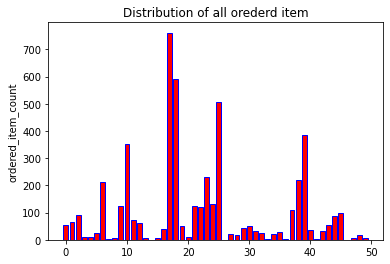

In [52]:
item_name_list = item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))#numpy.arange('시작','끝','간격') 으로 배열 만들기.
y_pos=item_quantity.values.tolist()#tolist() 배열로 만듬.
print(item_quantity.values) #series를
print(item_quantity.values.tolist())#list로
plt.bar(x_pos,y_pos,align='center',color='red',edgecolor='blue')##bar()는 막대 그래프를 출력해주는 함수
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orederd item')
plt.show()

### bar() bar(x,y,color,edgecolor,width,align,tick_lable)
x 좌표

y 좌표

color

edgecolor

width

align : 막대와 좌표의 위치

tick_lable :  리스트 또는 어레이 형태로 지정하면, 틱에 문자열을 순서대로 나타낼 수 있습니다.

tick? : 한칸.한줄.

<BarContainer object of 50 artists>

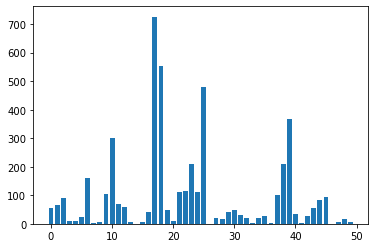

In [51]:
plt.bar(x_pos,order_count) ##아이템 주문 id개수 로 막대그래프 생성

In [43]:
item_countall=chipo['item_name'].value_counts() #판매 개수 순으로 series생성
item_countall

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips', 'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa', 'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos', 'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos', 'Chips and Roasted Chili Corn Salsa', 'Izze', 'Chips and Tomatillo-Red Chili Salsa', 'Veggie Salad Bowl', 'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad', 'Veggie Soft Tacos', 'Carnitas Crispy Tacos', 'Veggie Salad', 'Carnitas Salad Bowl', 'Burrito', 'Steak Salad', 'Crispy Tacos', 'Salad', 'Bowl', '

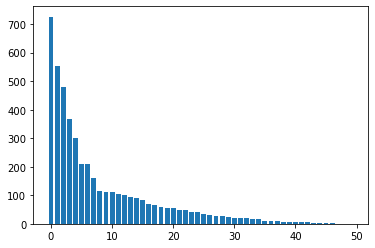

In [49]:
item_name_listall = item_countall.index.tolist()
print(item_name_listall)#불러온 item_countall의 index를 list로.
x_pos1=np.arange(len(item_name_listall))#numpy.arange('시작','끝','간격') 으로 배열 만들기.
y_pos2=item_countall.values.tolist()#item_countall의 avlues를 tolist() 배열로 만듬.
plt.bar(x_pos1,y_pos2)##bar()는 막대 그래프를 출력해주는 함수
plt.show()

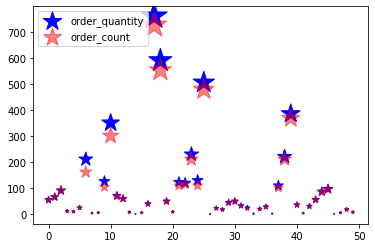

In [80]:
plt.scatter(x_pos, y_pos, s=y_pos,c="b",alpha=1.0, label="order_quantity",marker="*")
plt.scatter(x_pos,order_count, s=order_count,c="r", alpha=0.5, label="order_count",marker="*")
plt.legend(loc='upper left')

In [85]:
chipoitem=chipo['item_name']
chipoitem.value_counts()

<class 'pandas.core.series.Series'>


In [86]:
type(chipoitem.value_counts())

pandas.core.series.Series

In [83]:
chipoitem.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [87]:
type(chipoitem.unique())

numpy.ndarray

In [88]:
chipoitem.unique().tolist()

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos',
 'Chicken Soft Tacos',
 'Chicken Burrito',
 'Canned Soda',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Carnitas Bowl',
 'Bottled Water',
 'Chips and Tomatillo Green Chili Salsa',
 'Barbacoa Bowl',
 'Chips',
 'Chicken Salad Bowl',
 'Steak Bowl',
 'Barbacoa Soft Tacos',
 'Veggie Burrito',
 'Veggie Bowl',
 'Steak Crispy Tacos',
 'Chips and Tomatillo Red Chili Salsa',
 'Barbacoa Crispy Tacos',
 'Veggie Salad Bowl',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Carnitas Soft Tacos',
 'Chicken Salad',
 'Canned Soft Drink',
 'Steak Salad Bowl',
 '6 Pack Soft Drink',
 'Chips and Tomatillo-Red Chili Salsa',
 'Bowl',
 'Burrito',
 'Crispy Tacos',
 'Carnitas Crispy Tacos',
 'Steak Salad',
 'Chips and Mild Fresh Tomato Salsa',
 'Veggie Soft 

In [89]:
type(chipoitem.unique().tolist())

list